# Customer Churn Prediction

## 1.0 About Auther

- **Project**: Customer Churn Prediction
- **Auther**: Mutayyub Majeed
- **Date**: 
- **Contact Info.**  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/mutayyubmajeed/)  
[![GitHub](https://img.shields.io/badge/GitHub-Profile-black?style=for-the-badge&logo=github)](https://github.com/mutayyub)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/mutayyubmajeed)  
[![Twitter](https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/mutayyubmajeed)
[![Facebook](https://img.shields.io/badge/Facebook-Profile-1877F2?style=for-the-badge&logo=facebook&logoColor=white)](https://www.facebook.com/mutayyubmajeed/)




## 2.0 About Data

- **Data**: Customer Churn Dataset
- **Dataset**: [Link](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data)

### 2.1 Meta Data

Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned customer is one who has decided to discontinue their subscription or usage of the company's services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

Understanding customer churn is crucial for businesses to identify patterns, factors, and indicators that contribute to customer attrition. By analyzing churn behavior and its associated features, companies can develop strategies to retain existing customers, improve customer satisfaction, and reduce customer turnover. Predictive modeling techniques can also be applied to forecast and proactively address potential churn, enabling companies to take proactive measures to retain at-risk customers.


| Column Name           | Description                                                    |
| --------------------- | -------------------------------------------------------------- |
| **CustomerID**        | Unique identifier for each customer                            |
| **Age**               | Age of the customer                                            |
| **Gender**            | Gender of the customer (e.g., Male/Female)                     |
| **Tenure**            | How long the customer has been with the company (months/years) |
| **Usage Frequency**   | How frequently the customer uses the service                   |
| **Support Calls**     | Number of support/service calls made by the customer           |
| **Payment Delay**     | Delay in payment           |
| **Subscription Type** | Type of subscription (e.g., Basic, Standard, Premium)          |
| **Contract Length**   | Length of the contract (e.g., monthly, quaterly, yearly)                 |
| **Total Spend**       | Total amount of money spent by the customer                    |
| **Last Interaction**  | Time since the last customer interaction  |
| **Churn**             | Target variable → Whether the customer left (1) or stayed (0)  |

### 2.1 Task

- This is a Supervised Machine Learning task. (Classification Problem)
- **Goal**: Predict whether a customer will churn (leave) or stay.

## 3.0 Import libraries

In [62]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


## 4. Load the csv file with the pandas, exploring the data, and data wrangling

In [63]:
# load the dataset
df = pd.read_csv('./customer_churn/customer_churn.csv')

# Let's take a look at the first 5 rows of the dataset
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [64]:
# check number of rows and columns
print(f"The number of rows  are: {df.shape[0]}")
print(f"And the number of columns  are: {df.shape[1]}")

The number of rows  are: 64374
And the number of columns  are: 12


In [65]:
# drop Customer ID as it is not useful for analysis and drop Payment Delay 
df = df.drop(columns=['CustomerID', 'Payment Delay'], axis=1)

In [66]:
# take 10% sample of the dataset for faster computation
df = df.sample(frac=0.1, random_state=42)

In [67]:
# Let's get some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6437 entries, 15476 to 27393
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                6437 non-null   int64 
 1   Gender             6437 non-null   object
 2   Tenure             6437 non-null   int64 
 3   Usage Frequency    6437 non-null   int64 
 4   Support Calls      6437 non-null   int64 
 5   Subscription Type  6437 non-null   object
 6   Contract Length    6437 non-null   object
 7   Total Spend        6437 non-null   int64 
 8   Last Interaction   6437 non-null   int64 
 9   Churn              6437 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 553.2+ KB


In [68]:
# check missing values
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [69]:
# Count unique values in each column
unique_counts = df.nunique().sort_values(ascending=True)

print("Unique values per column:\n", unique_counts)

Unique values per column:
 Gender                 2
Churn                  2
Contract Length        3
Subscription Type      3
Support Calls         11
Usage Frequency       30
Last Interaction      30
Age                   48
Tenure                60
Total Spend          901
dtype: int64


In [70]:
# let's see the summary statistics of the dataset
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Total Spend,Last Interaction,Churn
count,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000,6437.000000
mean,41.977163,31.947802,15.171819,5.438403,542.101134,15.373777,0.461550
std,13.882764,17.129141,8.835015,3.107581,260.903358,8.707996,0.498558
min,18.000000,1.000000,1.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,17.000000,7.000000,3.000000,314.000000,8.000000,0.000000
50%,42.000000,33.000000,15.000000,6.000000,533.000000,15.000000,0.000000
75%,54.000000,47.000000,23.000000,8.000000,768.000000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,1000.000000,30.000000,1.000000


In [71]:
# Categorical columns analysis

# List of categorical columns
cat_cols = ["Gender", "Contract Length", "Subscription Type"]

# Display value counts and percentages for each categorical column
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')



Column: Gender
Gender
Female    53.16%
Male      46.84%
Name: proportion, dtype: object

Column: Contract Length
Contract Length
Monthly      34.36%
Annual       32.87%
Quarterly    32.76%
Name: proportion, dtype: object

Column: Subscription Type
Subscription Type
Premium     33.65%
Standard    33.46%
Basic       32.89%
Name: proportion, dtype: object


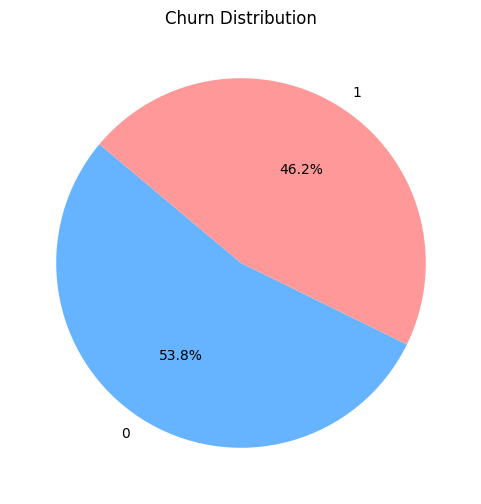

pic #1


In [72]:
# let's see the pie chart of the target variable
target_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Churn Distribution')
plt.show()

print("pic #1")

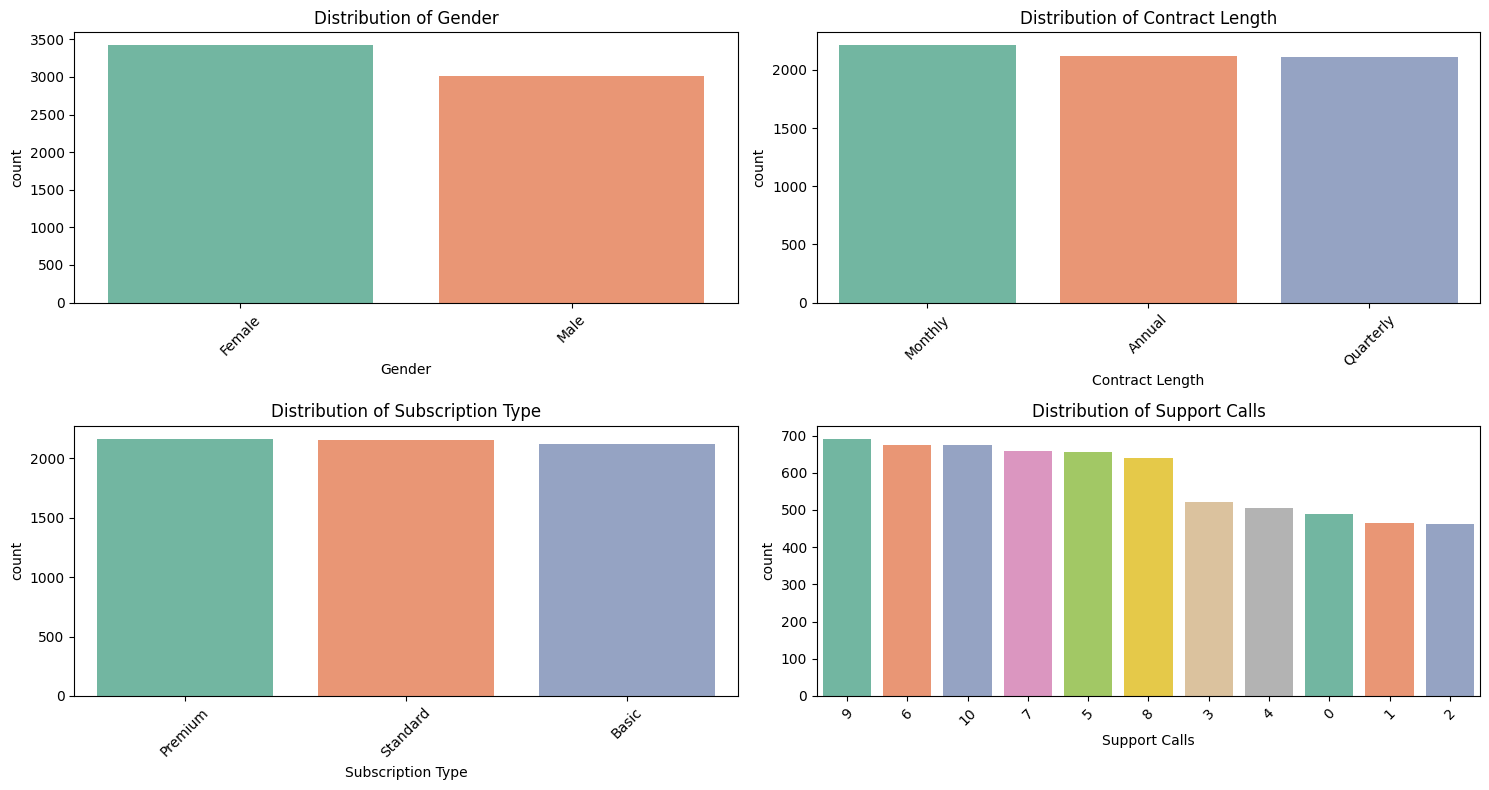

pic #2


In [73]:
# Columns to plot
bar_cols = ["Gender", "Contract Length", "Subscription Type", "Support Calls"]

# Set up grid
n_cols = 2
n_rows = (len(bar_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(bar_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    order = df[col].value_counts().index  # sort bars by frequency
    sns.countplot(x=col, data=df, order=order, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("pic #2")

### observations
1. Dataset has 64374 rows and 12 columns, 3 columns are categorical and 9 arenumeric.
2. There are no missing values in dataset.
3. As we have checked, the categorial columns are well balanced.

> Now we will plot hisplot of numeric columns to see **data distribution**.

<Figure size 1500x1000 with 0 Axes>

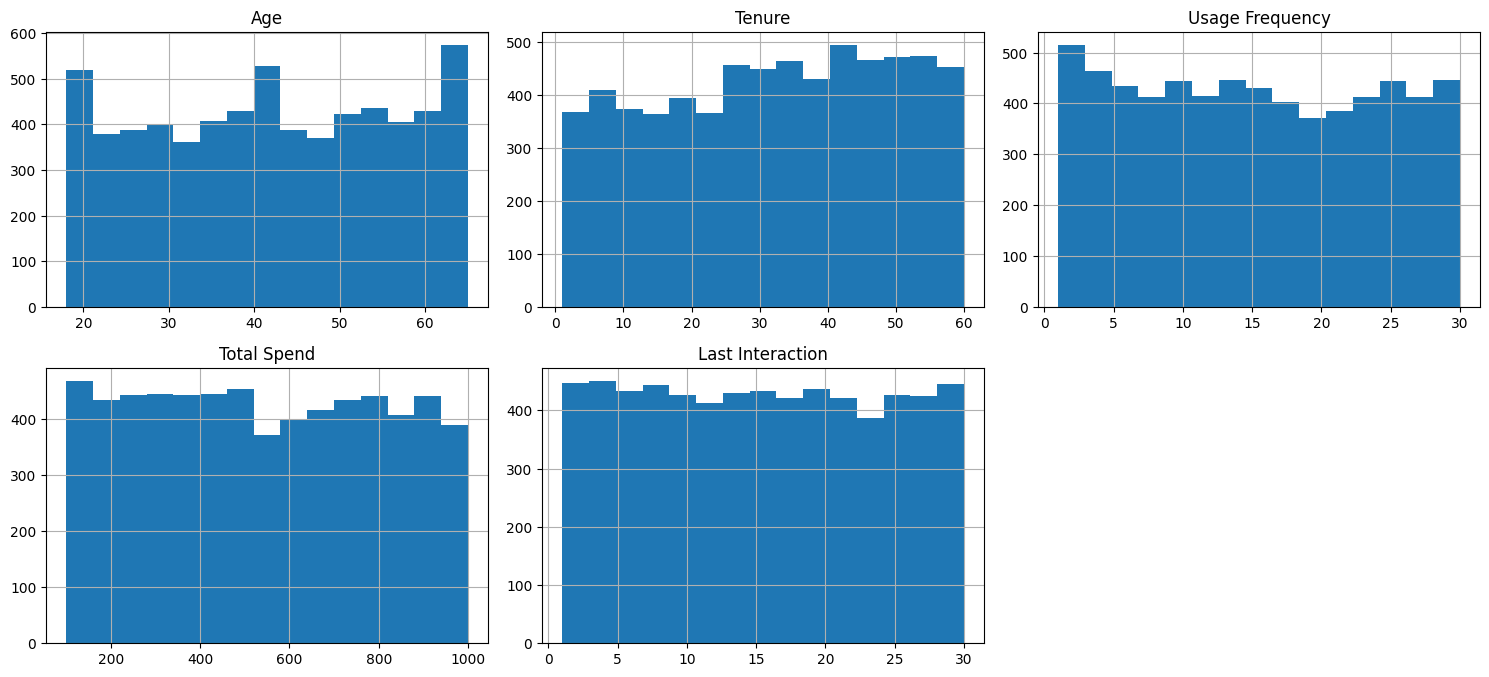

pic #3


In [74]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude target and discrete integer-like columns
exclude = ["Churn", "Support Calls"]  # add more if needed , "Payment Delay"
numeric_continuous = [col for col in numeric_cols if col not in exclude]

# Plot histograms for continuous numeric columns to check distribution
plt.figure(figsize=(15, 10))
df[numeric_continuous].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

print("pic #3")

pic #4


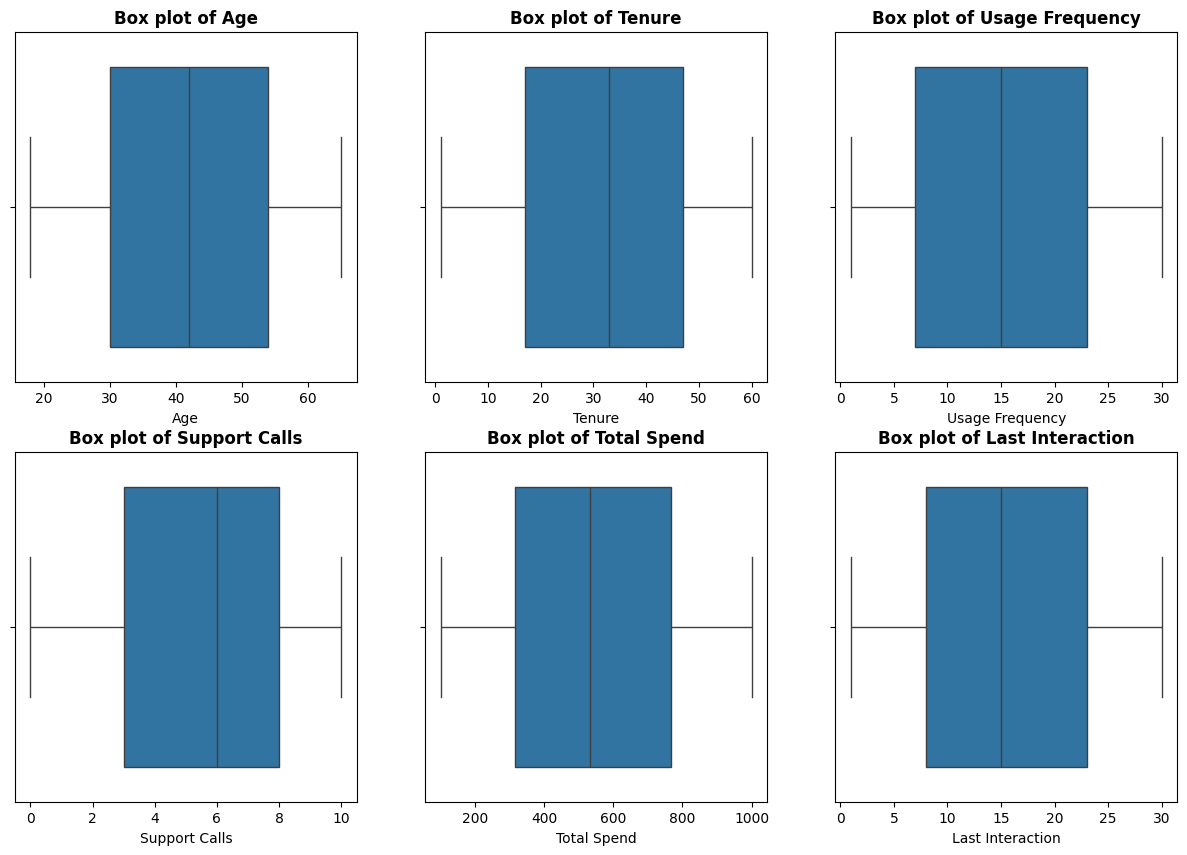

In [75]:
# Numeric columns
numeric_cols = ["Age", "Tenure", "Usage Frequency", "Support Calls", 
                "Total Spend", "Last Interaction"]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Create box plots for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontweight='bold')

print("pic #4")

### observations
1. The data is not skewed, so we don't need to normalize the data. (pic #3)
2. There is no outlier in the dataset.(pic #4)

In [76]:
# comparison categorical columns with target variable

# Gender vs Churn
ct_gender = pd.crosstab(df['Gender'], df['Churn'], normalize='index') * 100
print(ct_gender)

# Contract Length vs Churn
ct_contract = pd.crosstab(df['Contract Length'], df['Churn'], normalize='index') * 100
print(ct_contract)

# Subscription Type vs Churn
ct_sub = pd.crosstab(df['Subscription Type'], df['Churn'], normalize='index') * 100
print(ct_sub)

Churn           0          1
Gender                      
Female  47.282291  52.717709
Male    61.293532  38.706468
Churn                    0          1
Contract Length                      
Annual           53.969754  46.030246
Monthly          50.497288  49.502712
Quarterly        57.230915  42.769085
Churn                      0          1
Subscription Type                      
Basic              53.424658  46.575342
Premium            55.078486  44.921514
Standard           53.017642  46.982358


> `Support Calls` and `Payment Delay` are numeric but actually behave like categorical so we will make binning of these two columns

In [77]:
# Now let's make binning of Payment Delay and Support Calls
df1 = df.copy()
df1['SupportCalls_Bin'] = pd.cut(
    df['Support Calls'],
    bins=[-1, 3, 4, 10],   # thresholds
    labels=['Low', 'Medium', 'High']
)


In [78]:
# Now, let's analyze the relationship between Subscription Type and churn

# Support Calls vs Churn
ct_support = pd.crosstab(df['Subscription Type'], df['Churn'], normalize='index') * 100
print(ct_support)

Churn                      0          1
Subscription Type                      
Basic              53.424658  46.575342
Premium            55.078486  44.921514
Standard           53.017642  46.982358


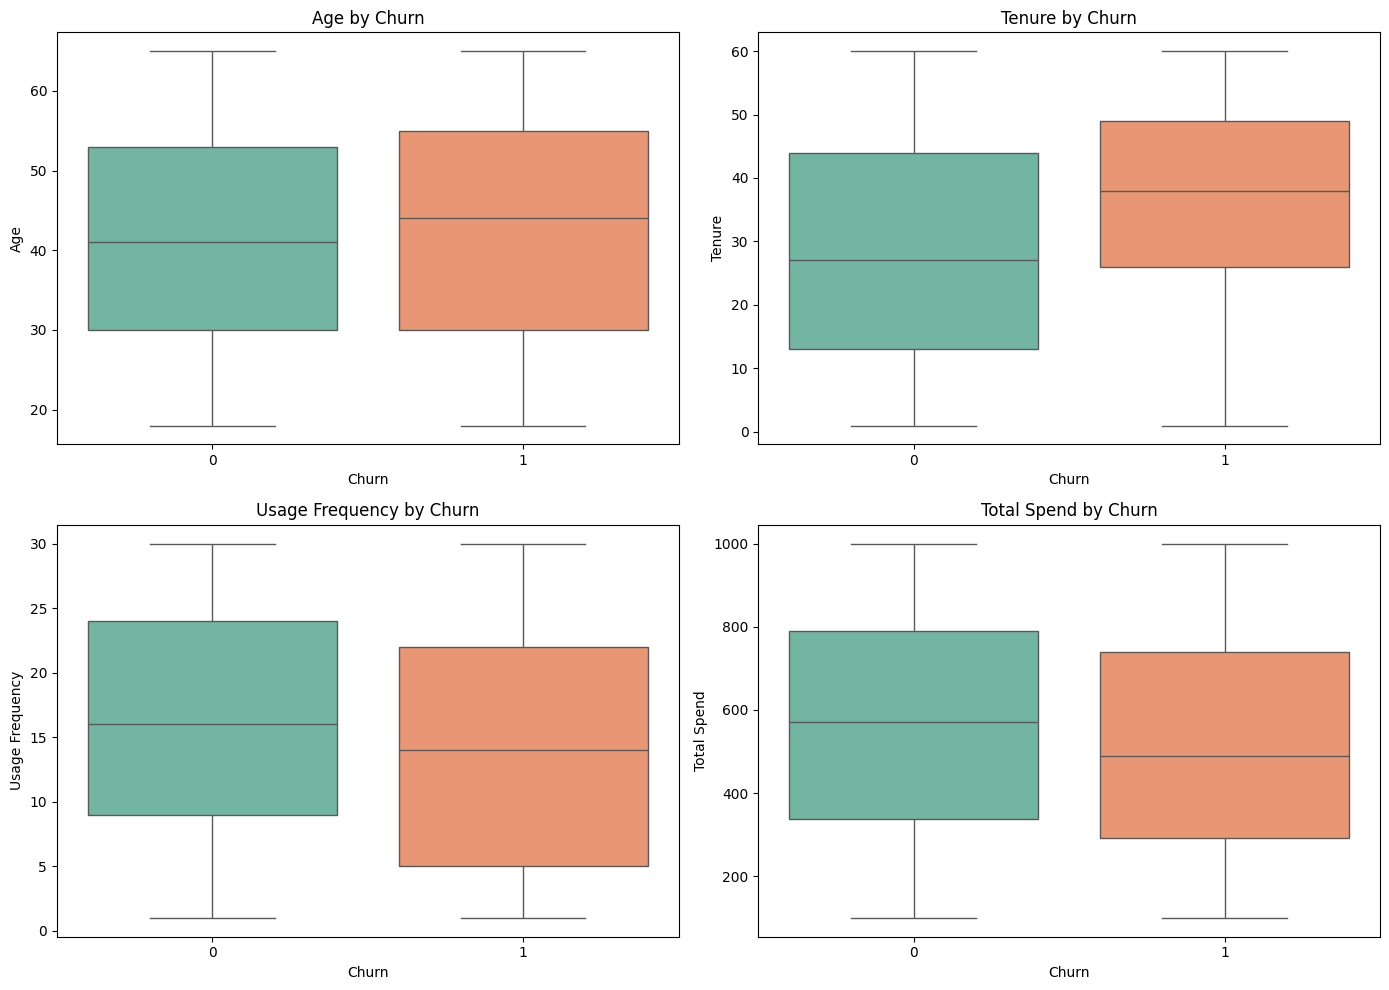

pic #5


In [79]:
# numeric columns to compare
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Total Spend']

# create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 3 columns
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} by Churn")

plt.tight_layout()
plt.show()

print("pic #5")

### observations:

1. female churn is higher (Gender matters).
2. Contract Length matters the most (monthly plans → higher churn).
3. Subscription Type doesn’t matter much (almost balanced).
4. `0–3` calls → churn rate is ~23.7% → relatively low. `4 calls` → jumps to ~31.8% → warning sign. `5+ calls` → huge jump → ~60% churn.
5. Customers with `lower usage and lower spend` are more likely to churn. 
6. Churned customers often have higher tenure, possibly linked to contract expirations or long-term dissatisfaction. and age has no majar diffrence.

pic #5


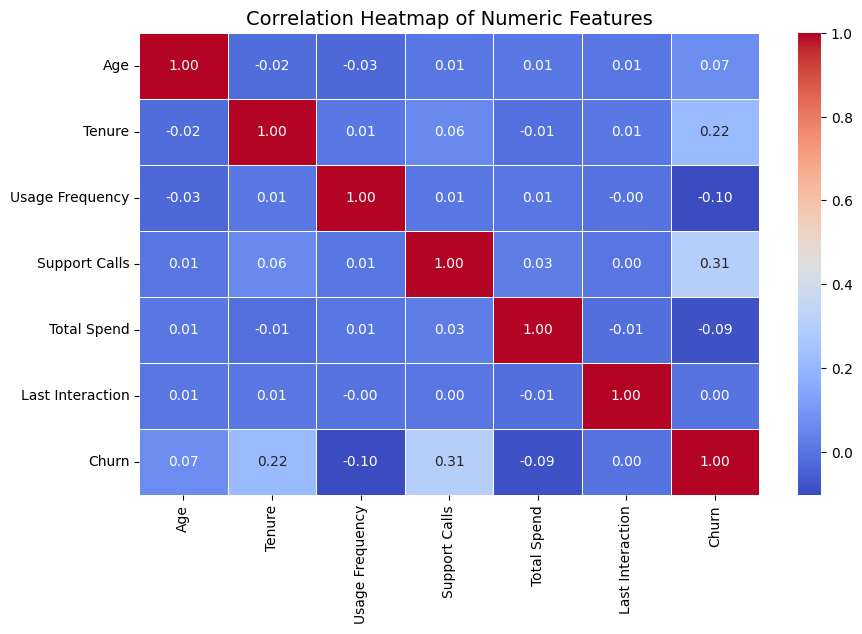

In [80]:
print("pic #5")

# select numeric columns only
numeric_cols = df.select_dtypes(include='number')

# compute correlation matrix
corr = numeric_cols.corr()

# plot heatmap to visualize correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


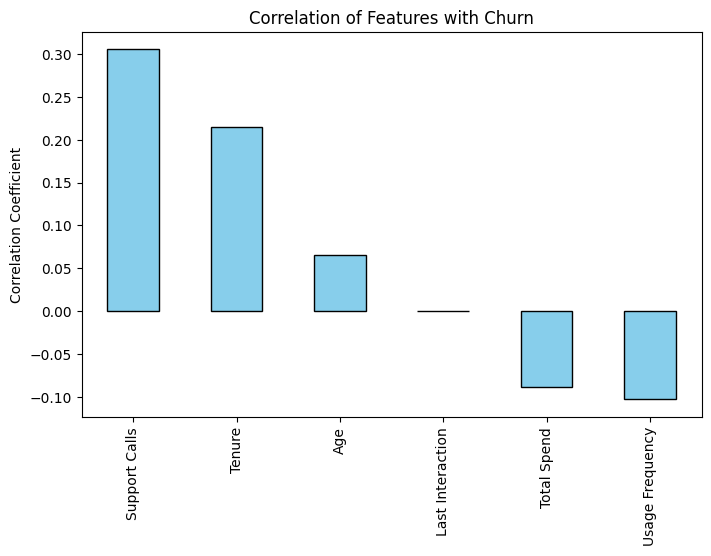

pic #7


In [81]:
# Correlation of features with Churn
corr_with_churn = corr["Churn"].drop("Churn").sort_values(ascending=False)

plt.figure(figsize=(8,5))
corr_with_churn.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Correlation of Features with Churn")
plt.ylabel("Correlation Coefficient")
plt.show()


print("pic #7")

### Observations

* **Payment Delay** showed an unusually high positive correlation with **Churn**, indicating **data leakage** → this feature was dropped.
* **Last Interaction** has almost zero correlation (-0.00) with Churn, meaning no linear relationship, but it may still carry non-linear patterns useful for tree-based models.
* **Usage Frequency** and **Total Spend** show a slight negative correlation with **Churn** → customers who spend more or use the service frequently are less likely to churn.
* Other numerical features (Age, Tenure, Support Calls, etc.) show low correlations, suggesting that churn depends on the combined effect of multiple features rather than one dominant variable.


In [82]:
# select features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [83]:
# encode the categorical columns
label_encoders = {}

for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string to handle mixed types
    label_encoders[col] = le

In [84]:
# Manually define numeric columns
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 
                'Support Calls', 'Total Spend', 'Last Interaction']

# Initialize scaler
scaler = StandardScaler()

# Copy before scaling
X_scaled = X.copy()

# Scale only numeric columns
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [85]:
# Create a dictionaries of list of models to evaluate performance with hyperparameters

models = { 
          'LogisticRegression' : (LogisticRegression(), {'C': [0.1, 1, 10]}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10]}),
          'DecisionTreeClassifier' : (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
          'RandomForestClassifier' : (RandomForestClassifier(), {'n_estimators': [50, 100]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 21, 2)}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(), {'n_estimators': [10, 100]}),
          'AdaBoostClassifier' : (AdaBoostClassifier(),  {'n_estimators': [50, 100]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}),
        #   'CatBoostClassifier' : (CatBoostClassifier(verbose=0), {'iterations': [100, 200], 'depth': [4, 6, 8], 'learning_rate': [0.01, 0.1]}),        
          }

In [86]:
metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]
best_params = []

from sklearn.model_selection import cross_validate

# Metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Cross-validation for each model
for name, (model, params) in models.items():
    grid = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')
    grid.fit(X, y)
    
    best_model = grid.best_estimator_
    cv_results = cross_validate(best_model, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    model_name.append(name)  # use the dict key
    test_accuracy.append(round(cv_results['test_accuracy'].mean(), 3) * 100)
    test_precision.append(round(cv_results['test_precision'].mean(), 3) * 100)
    test_recall.append(round(cv_results['test_recall'].mean(), 3) * 100)
    test_f1.append(round(cv_results['test_f1'].mean(), 3) * 100)
    best_params.append(grid.best_params_)


# Create DataFrame
metrics_dict = {
    'model': model_name,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1': test_f1,
    'best_params': best_params
}

model_metrics = pd.DataFrame(metrics_dict).sort_values('test_accuracy', ascending=False)

# Style output
metrics_styled = model_metrics.style.background_gradient(
    subset=['test_accuracy', 'test_f1'], cmap='YlGn'
)

metrics_styled


,model,test_accuracy,test_precision,test_recall,test_f1,best_params
7,XGBClassifier,77.100000,70.600000,86.400000,77.700000,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}"
3,RandomForestClassifier,76.400000,70.900000,83.000000,76.400000,{'n_estimators': 100}
2,DecisionTreeClassifier,76.200000,67.800000,92.400000,78.200000,{'max_depth': 5}
5,GradientBoostingClassifier,76.100000,71.000000,81.400000,75.900000,{'n_estimators': 100}
6,AdaBoostClassifier,71.000000,69.600000,65.900000,67.700000,{'n_estimators': 100}
0,LogisticRegression,67.800000,65.500000,63.900000,64.700000,{'C': 10}
1,SVC,65.700000,64.100000,58.600000,61.200000,"{'C': 10, 'kernel': 'rbf'}"
4,KNeighborsClassifier,61.400000,58.400000,56.200000,57.300000,{'n_neighbors': np.int64(7)}


In [87]:
final_model=XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=50)
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
y_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.78027950310559

Feature Importance Gain


<Axes: >

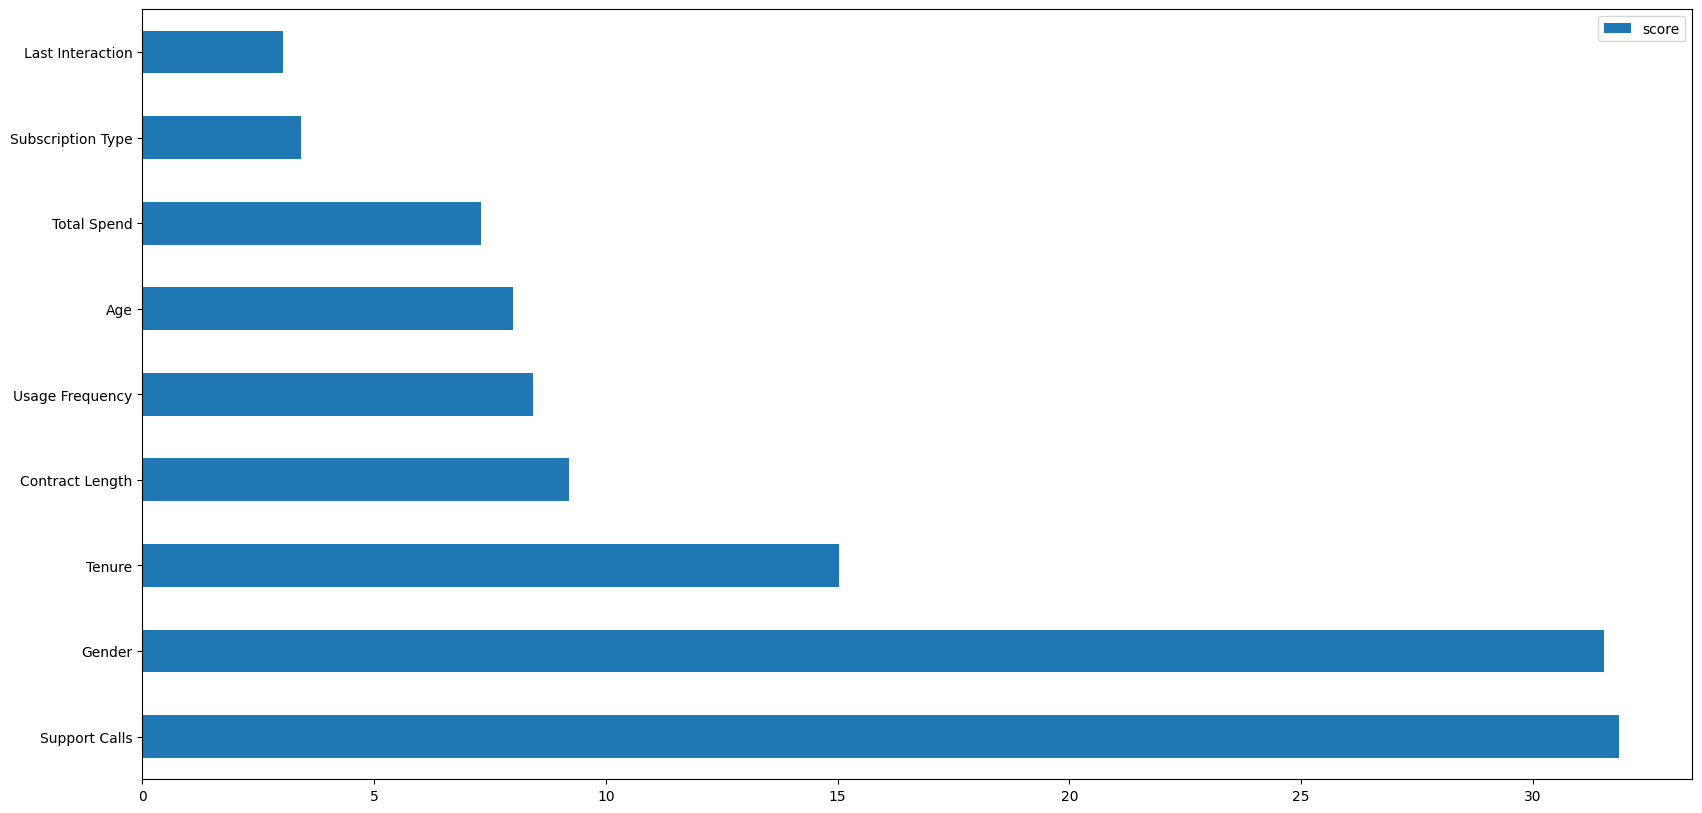

In [28]:
print("Feature Importance Gain")
feature_important = final_model.get_booster().get_score(importance_type="gain")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

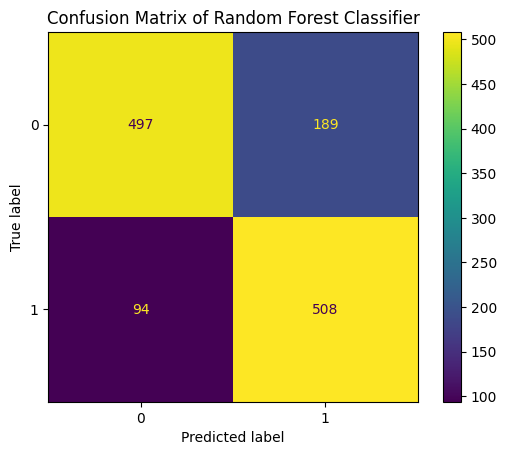

In [29]:
# import confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [30]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Create a list to store the actual and predicted values
results = []

# Store the actual and predicted log_price values in the list
for actual, predicted in zip(y_test, y_pred):
    results.append((actual, predicted))

# Convert the list into a DataFrame
XGBoost_df = pd.DataFrame(results, columns=['Actual', 'Predicted'])

# Print the DataFrame
XGBoost_df.tail(5)

,Actual,Predicted
1283,1,0
1284,1,1
1285,1,1
1286,1,1
1287,0,0


In [31]:
# Save with pickle
import pickle
with open("finalized_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

# Save scaler separately
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


## Final Summary

The objective of this project was to predict customer churn — whether a customer will stay or leave — using machine learning models.

- We have trained multiple models and evaluated using cross-validation, including Logistic Regression, Random Forest, Gradient Boosting, AdaBoost, XGBoost, and CatBoost.
- After hyperparameter tuning and evaluation on test data, the XGBoost Classifier emerged as the best-performing model, achieving around 78.5% accuracy.
- `Business insight`: Customers who **use the service more frequently and spend more** are less likely to churn. Efforts to increase engagement and spending may help improve retention.